In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium
from folium import plugins
from folium.plugins import Draw
from folium.plugins import HeatMap

Defaulting to user installation because normal site-packages is not writeable


In [4]:
#load our datasets from csv files to dataframes
sf_housing_projects = pd.read_csv("./housing_production_2005-present.csv")
sf_addresses = pd.read_csv("./Addresses_-_Enterprise_Addressing_System_20240317.csv")
global_protests = pd.read_csv("./mmALL_073120_csv.csv")

/tmp/ipykernel_11293/3400276745.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_addresses = pd.read_csv("./Addresses_-_Enterprise_Addressing_System_20240317.csv")


In [5]:
#take a peak at each dataset with .head()
sf_housing_projects.head()

,building_permit_application_number,permit_address,permit_description,existing_units_in_PTS_database,proposed_units_in_PTS_database,actual_proposed_units,net_units,net_units_completed,first_completion_date,latest_completion_date,...,planning_district,plan_area,permit_form_number,permit_type,issued_date,authorization_date,zoning_district,project_affordability_type,block_lot,project_id
0,201602089004,950 MARKET ST,"TO ERECT 13 STORIES, 2 BASEMENTS, TYPE I-A, 47...",0,470,470,470,242,2021-09-03,2021-11-12,...,4 - Downtown,Downtown,1,Site Permit,2017-12-14,2019-04-08,C-3-G,Inclu: Land Dedication,0342001,2013.1049
1,201611283577,30 OTIS ST,"TO ERECT 27 STORIES, 2 BASEMENT, TYPE I-A, 404...",0,404,404,404,395,2021-07-19,2021-08-06,...,8 - Mission,Downtown,1,Site Permit,2019-01-22,2019-08-09,C-3-G,Inclu: Fee Payment,3505016,2015-010013PRJ
2,201306210213,2171 03RD ST,"TO ERECT 7 STORIES,1 BASEMENT, TYPE IB, 109 UN...",0,109,109,109,104,2020-07-15,2020-07-15,...,9 - South of Market,Mission Bay,1,Site Permit,2017-06-08,2017-12-27,UMU,Inclu: On-Site BMR,4045003,2013.0784
3,201801128565,1856 PACIFIC AV,"PER ADU UNIT ORDINANCE# 162-16, CONVERT GROUND...",11,16,16,5,1,2020-08-11,2020-08-11,...,2 - Marina,NaN,3,Full BP,2019-07-11,2019-07-11,RH-2,NaN,0576011,2018-001265PRJ
4,9824818,1328 MISSION ST,4 STORY (12 LIVE WORK) 1 STORY PARKING,0,12,12,12,12,2016-04-02,2016-04-02,...,4 - Downtown,Downtown,2,Full BP,1999-08-16,1999-08-16,C-3-G,Inclu: On-Site BMR,3508020,1998.940


In [6]:
sf_addresses.head()

,EAS BaseID,Address,Address Number,Address Number Suffix,Street Name,Street Type,ZIP Code,CNN,Longitude,Latitude,...,numbertext,supname,nhood,complete_landmark_name,data_as_of,data_loaded_at,Analysis Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts
0,489689,413 STONERIDGE LN,413,NaN,STONERIDGE,LN,94134,19972000,-122.426649,37.710553,...,ELEVEN,Ahsha Safai,Excelsior,NaN,2024/03/16 10:01:56 PM,2024/03/16 10:03:50 PM,7.0,58.0,9.0,1.0
1,294431,1439 BAKER ST,1439,NaN,BAKER,ST,94115,2617000,-122.443391,37.784394,...,FIVE,Dean Preston,Presidio Heights,NaN,2024/03/16 10:01:56 PM,2024/03/16 10:03:50 PM,31.0,103.0,8.0,11.0
2,450789,2951 PACIFIC AVE,2951,NaN,PACIFIC,AVE,94115,10161000,-122.443867,37.791914,...,TWO,Catherine Stefani,Pacific Heights,NaN,2024/03/16 10:01:56 PM,2024/03/16 10:03:50 PM,30.0,102.0,8.0,6.0
3,480446,441 EDINBURGH ST,441,NaN,EDINBURGH,ST,94112,5089000,-122.431054,37.722040,...,ELEVEN,Ahsha Safai,Excelsior,NaN,2024/03/16 10:01:56 PM,2024/03/16 10:03:50 PM,7.0,90.0,9.0,1.0
4,447705,2432 LARKIN ST,2432,NaN,LARKIN,ST,94109,8152000,-122.420685,37.800395,...,THREE,Aaron Peskin,Russian Hill,NaN,2024/03/16 10:01:56 PM,2024/03/16 10:03:50 PM,32.0,107.0,6.0,6.0


In [28]:
global_protests[["startday","startmonth","startyear","endday","endmonth", "endyear"]]

,startday,startmonth,startyear,endday,endmonth,endyear
0,15.0,1.0,1990.0,15.0,1.0,1990.0
1,25.0,6.0,1990.0,25.0,6.0,1990.0
2,1.0,7.0,1990.0,1.0,7.0,1990.0
3,12.0,7.0,1990.0,6.0,9.0,1990.0
4,14.0,8.0,1990.0,15.0,8.0,1990.0
...,...,...,...,...,...,...
17140,15.0,7.0,2017.0,15.0,7.0,2017.0
17141,31.0,10.0,2017.0,31.0,10.0,2017.0
17142,NaN,NaN,NaN,NaN,NaN,NaN
17143,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
global_protests[global_protests["startday"] != global_protests["endday"]]

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
6,201991001,Canada,20,1991,North America,1,1,10.0,9.0,1991.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. mulroney acts to crush strike by federal wo...,"brian mulroney, the embattled conservative pri..."
7,201991002,Canada,20,1991,North America,1,2,28.0,9.0,1991.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"1. the washington post, canada seeks to compel...",the canadian government introduced mandatory b...
8,201992001,Canada,20,1992,North America,1,1,4.0,5.0,1992.0,...,NaN,arrests,NaN,NaN,NaN,NaN,NaN,NaN,1. window smashing and looting spree erupts in...,rioting was in response to the killing of a bl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17137,9102015000,Papua New Guinea,910,2015,Oceania,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN
17138,9102016001,Papua New Guinea,910,2016,Oceania,1,1,15.0,5.0,2016.0,...,NaN,shootings,killings,crowd dispersal,NaN,NaN,NaN,NaN,papua new guinea: reports of up to four people...,police in papua new guinea fired gunshots wedn...
17142,9102018000,Papua New Guinea,910,2018,Oceania,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17143,9102019000,Papua New Guinea,910,2019,Oceania,0,0,NaN,NaN,NaN,...,.,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN


In [10]:
global_protests

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,...,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,...,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,15.0,7.0,2017.0,...,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...
17141,9102017003,Papua New Guinea,910,2017,Oceania,1,3,31.0,10.0,2017.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,refugees dig in as camp closes; manus situatio...,refugees on manus island were braced for poten...
17142,9102018000,Papua New Guinea,910,2018,Oceania,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17143,9102019000,Papua New Guinea,910,2019,Oceania,0,0,NaN,NaN,NaN,...,.,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN


***Exploratory Data Analysis:***
First steps are to always understand what the granularity of the data is, what features (columns) exist, what is the sparsity (how many non-null values are there per column), what datatype is each feature, and what shape is the data (rows, cols)

- The .info() function makes our lives so easy!

Granualarity of each dataset:
1. SF Housing Project: by building permit filed (2005-2023)
2. SF Addresses: by active base address from San Francisco's Enterprise Addressing System (Updated 3/15/2024)
3. Global Protest: by protest-country-year (from 1990-2024)





In [11]:
#look at column info, sparsity (how many non-nulls per col), and datatype of each column
sf_housing_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5188 entries, 0 to 5187
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   building_permit_application_number         5188 non-null   object
 1   permit_address                             5188 non-null   object
 2   permit_description                         5186 non-null   object
 3   existing_units_in_PTS_database             5188 non-null   int64 
 4   proposed_units_in_PTS_database             5188 non-null   int64 
 5   actual_proposed_units                      5188 non-null   int64 
 6   net_units                                  5188 non-null   int64 
 7   net_units_completed                        5188 non-null   int64 
 8   first_completion_date                      5188 non-null   object
 9   latest_completion_date                     5188 non-null   object
 10  extremely_low_income_units          

In [12]:
sf_addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223689 entries, 0 to 223688
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   EAS BaseID                    223689 non-null  int64  
 1   Address                       223689 non-null  object 
 2   Address Number                223689 non-null  int64  
 3   Address Number Suffix         4767 non-null    object 
 4   Street Name                   223689 non-null  object 
 5   Street Type                   222686 non-null  object 
 6   ZIP Code                      223689 non-null  int64  
 7   CNN                           223689 non-null  int64  
 8   Longitude                     223689 non-null  float64
 9   Latitude                      223689 non-null  float64
 10  point                         223689 non-null  object 
 11  supdist                       223689 non-null  object 
 12  supervisor                    223689 non-nul

In [13]:
global_protests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17145 non-null  int64  
 1   country                17145 non-null  object 
 2   ccode                  17145 non-null  int64  
 3   year                   17145 non-null  int64  
 4   region                 17145 non-null  object 
 5   protest                17145 non-null  int64  
 6   protestnumber          17145 non-null  int64  
 7   startday               15239 non-null  float64
 8   startmonth             15239 non-null  float64
 9   startyear              15239 non-null  float64
 10  endday                 15239 non-null  float64
 11  endmonth               15239 non-null  float64
 12  endyear                15239 non-null  float64
 13  protesterviolence      15758 non-null  float64
 14  location               15218 non-null  object 
 15  pa

In [14]:
#Let's FILTER!
#Select protests only from Haiti
haitian_protests = global_protests[global_protests["country"] == "Haiti"]

#Select Haitian protests started from 2010-2015, the years during and after the catastrophic 7.0M earthquake
haitian_protests_1015 = haitian_protests[(haitian_protests["startyear"] >= 2010) & (haitian_protests["startyear"] <= 2015)]
haitian_protests_1015

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
250,412010001,Haiti,41,2010,North America,1,1,15.0,11.0,2010.0,...,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"1. u.n. troops assaulted, blamed for outbreak ...",protests were triggered by the cholera outbrea...
251,412010002,Haiti,41,2010,North America,1,2,18.0,11.0,2010.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. interview: haitian presidential candidate m...,protests were directed against the continued p...
252,412010003,Haiti,41,2010,North America,1,3,28.0,11.0,2010.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. angry voters flood streets as several candi...,protests were directed at alleged voter fraud ...
253,412010004,Haiti,41,2010,North America,1,4,7.0,12.0,2010.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. thousands of haitians riot in capital over ...,the haitian police did not respond to the riot...
254,412011001,Haiti,41,2011,North America,1,1,7.0,2.0,2011.0,...,NaN,shootings,NaN,NaN,NaN,NaN,NaN,NaN,1. protesters denounce preval; demand presiden...,around 200 protesters demanding that haiti s o...
255,412011002,Haiti,41,2011,North America,1,2,15.0,9.0,2011.0,...,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,1. clashes at protest over peacekeeper rape ca...,protesters demanded the removal of un peacekee...
256,412012001,Haiti,41,2012,North America,1,1,1.0,3.0,2012.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. a day in the life of michel martelly the au...,several thousand supporters of former haitian ...
257,412012002,Haiti,41,2012,North America,1,2,19.0,5.0,2012.0,...,NaN,arrests,NaN,NaN,NaN,NaN,NaN,NaN,"1. ex soldiers want back sunday mirror, may 20...",protests were calling for the restoration of t...
258,412012003,Haiti,41,2012,North America,1,3,26.0,6.0,2012.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. haitians protest government plan to destroy...,"more than 1,000 haitians marched through the c..."
259,412013001,Haiti,41,2013,North America,1,1,19.0,7.0,2013.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,"1. more than 1,000 show up for haiti anti gay ...",protesters opposed a proposal to legalize gay ...


In [15]:
#Let's say we want to see how the Haitian government responded to the protests over these years
#We can groupby column "stateresponse1"
#TIP: I first start by selecting only two cols to make the aggregation cleaner (less columns to look at)
#Make sure when you do this, you pick a column that does not have null values ("country") along with your aggregation index ("stateresponse1")
aggregation = haitian_protests_1015[["stateresponse1", "country"]].groupby("stateresponse1").agg("count").reset_index()
aggregation

,stateresponse1,country
0,arrests,1
1,crowd dispersal,11
2,ignore,16
3,shootings,2


In [16]:
#Now looking at our SF datasets
#Let's aggregate by planning_districts to see the distribution of where sf_housing projects are planned
#I first start by selecting only two cols to make the aggregation cleaner (less columns to look at)
#Make sure when you do this, you pick a column that does not have null values!
planned = sf_housing_projects[["planning_district","net_units"]].groupby("planning_district").agg("count").reset_index()

#We can sort by the aggregated counts to see the order of least to greatest/greatest to least
planned.sort_values("net_units", ascending=False)

,planning_district,net_units
5,12 - South Central,567
2,1 - Richmond,507
14,7 - Central,498
3,10 - South Bayshore,480
15,8 - Mission,435
6,13 - Ingleside,415
16,9 - South of Market,397
8,15 - Outer Sunset,273
10,3 - Northeast,266
12,5 - Western Addition,265


In [19]:
#Another way to find the same data is with .value_counts
#TIP: play around with setting normalize to True and see how the bar chart axis changes!
planned = sf_housing_projects["planning_district"].value_counts(normalize=False).rename_axis('unique_values').reset_index(name='counts')
planned

,unique_values,counts
0,12 - South Central,567
1,1 - Richmond,507
2,7 - Central,498
3,10 - South Bayshore,480
4,8 - Mission,435
5,13 - Ingleside,415
6,9 - South of Market,397
7,15 - Outer Sunset,273
8,3 - Northeast,266
9,5 - Western Addition,265


Text(0.5, 1.0, 'SF Housing Projects per District Since 2005')

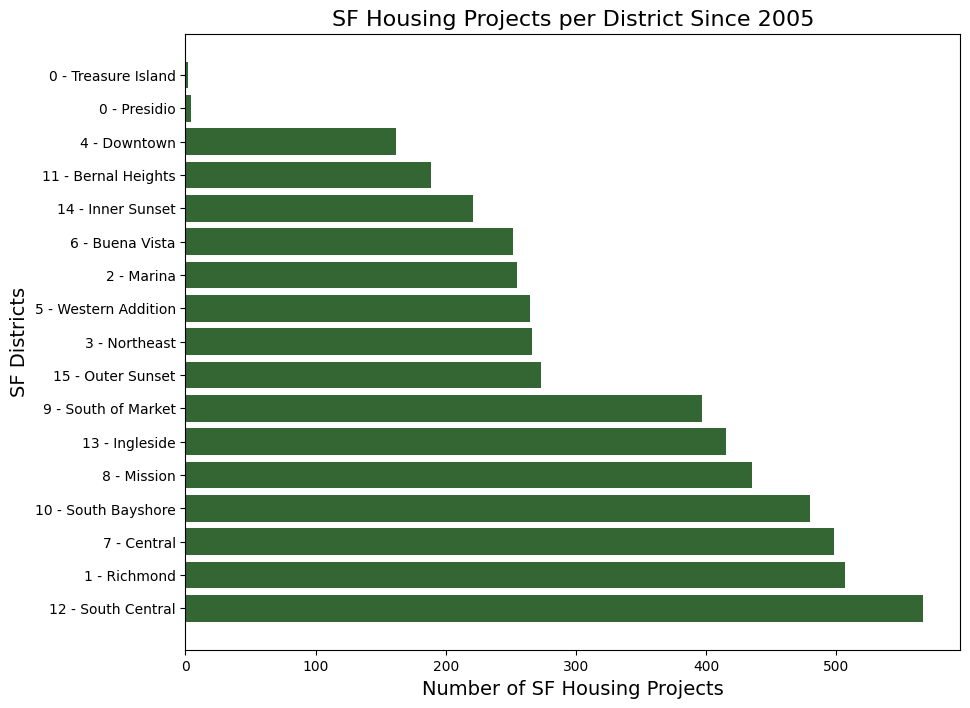

In [20]:
#Let's visualize this data as a bar chart! plt.bar vs. plt.barh is vertical vs. horizontal
#Always use axis and labels and titles! You can not be a data scientist without doing this :)
#In this cell, we can customize color of bars (RGB values), figsize (size of plot), and fontsize
#Try playing around with the figsize, color values, and fontsizes

plt.figure(figsize=(10, 8))
plt.barh(planned["unique_values"], planned["counts"], color=(0.2, 0.4, 0.2))
plt.xlabel("Number of SF Housing Projects", fontsize=14)
plt.ylabel("SF Districts", fontsize=14)
plt.title("SF Housing Projects per District Since 2005", fontsize=16)

# Visualization Exercise Number 1: it's time for you to plot on your own!

Text(0.5, 1.0, 'Haitian Protest response from 2010 to 2015')

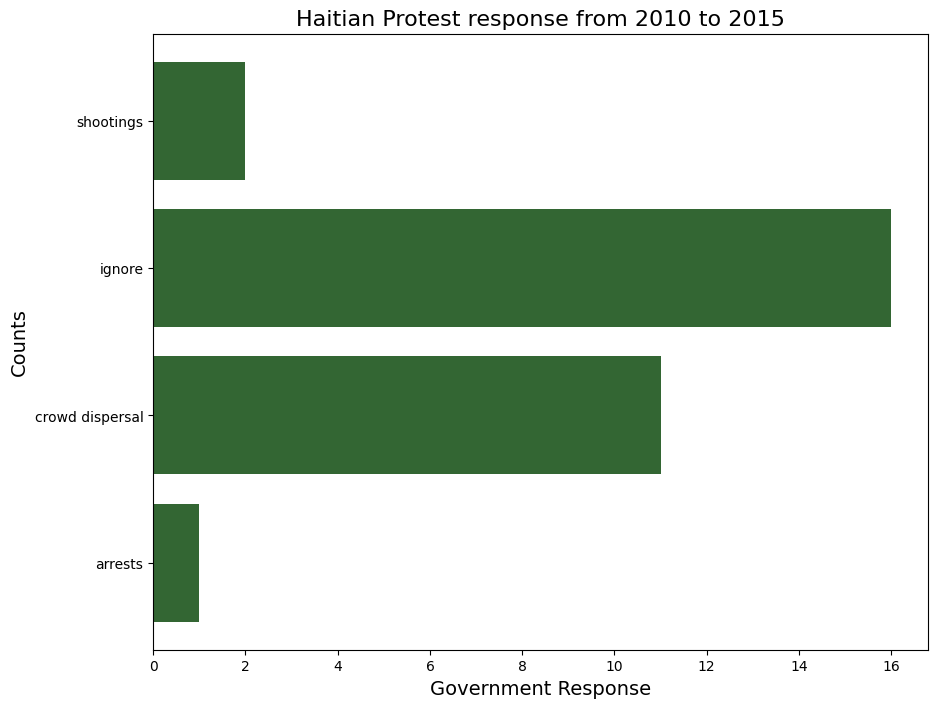

In [27]:
#NOW YOU TRY
#WRITE CODE TO VISUALIZE THE DISTRIBUTION OF GOVERNMENT RESPONSES TO PROTESTS IN HAITI FROM 2010-2015
#HINT: YOU WILL NEED TO USE THE DATAFRAME "aggregation" AND THE CODE WE JUST RAN FOR THE ABOVE BAR CHART
#FUN: CHANGE FUNCTION PARAMS TO MAKE THE BARS A DIFFERENT COLOR + CHANGE THE FONT SIZES

#########################################################################################################YOUR CODE HERE###################################################################################################################
plt.figure(figsize=(10, 8))
plt.barh(aggregation["stateresponse1"], aggregation["country"], color=(0.2, 0.4, 0.2))
plt.xlabel("Government Response", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.title("Haitian Protest response from 2010 to 2015", fontsize=16)


# Visualization Exercise Number 2: look up documentation for plt.scatter() and create a scatter plot displaying the relationship between years and length of protests in Canada (global_protests dataset)

In [ ]:
#Today, we will be dropping rows with NaNs
#In every data science project, you will have to seriously consider how you deal with missing values
#Whether you drop them or impute NaNs with an average is up to you, but any choice you make will affect your data analysis and interpretation
#We will drop any rows from our global_protests dataset without information start and end dates, as we are interested in exploring the day-length of protests
global_protests = global_protests.dropna(subset=["startday"])

In [ ]:
#Add a column with a datetime object for start and end dates
#Extract day difference from time delta after subtracting start from end

start = global_protests[['startday', 'startmonth', 'startyear']]
end = global_protests[['endday', 'endmonth', 'endyear']]
start = start.rename(mapper={"startday":"day", "startmonth":"month", "startyear":"year"}, axis=1)
end = end.rename(mapper={"endday":"day", "endmonth":"month", "endyear":"year"}, axis=1)

global_protests['startdatetime'] = pd.to_datetime(start[['day', 'month', 'year']])
global_protests['enddatetime'] = pd.to_datetime(end[['year', 'month', 'day']])
global_protests["timedelta"] = global_protests['enddatetime'] - global_protests['startdatetime']
global_protests["day-length"] = global_protests["timedelta"].apply(lambda delta: delta.days)

#NOW YOU TRY
#HINT: you will need to filter first, and then for plotting, "day-length" is a useful column

#########################################################################################################YOUR CODE HERE###################################################################################################################

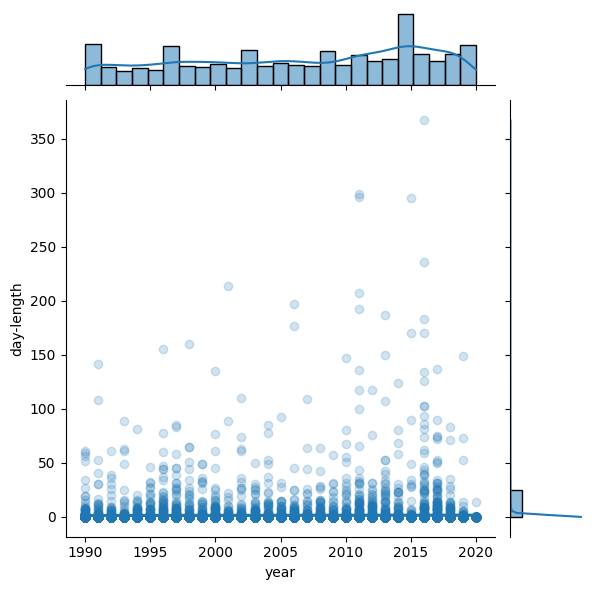

In [ ]:
#Let's say we want to look at this data globally, but want to avoid overplotting
#We can use jointplots from Seaborn
#We can filter out protests that were longer than 500 days
global_data_remove_otlier = global_protests[global_protests["day-length"] < 501]
sns.jointplot(data=global_data_remove_otlier, x='year', y='day-length', kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)})

# Moving on to mapping with **Folium**! Let's create a heatmap of housing projects in SF, specifically very low income housing projects (from 2005-2023)

In [ ]:
#CAST all permit_addresses to upper case so we can merge on this column with the sf_adresses dataset "Address" column
sf_housing_projects["permit_address"] = sf_housing_projects["permit_address"].str.upper()

#"AV" must be "AVE" for merge to work
#Here we can use a lambda function with .apply to vectorize data manipulation (a common DS technique)
sf_housing_projects["permit_address"] = sf_housing_projects["permit_address"].apply(lambda row: row + "E" if row[-1] == "V" else row)

#MERGE projects dataset with sf_housing to get latitude and longitude for projects, useful for mapping
housing_merged = sf_housing_projects.merge(sf_addresses, how="left", left_on="permit_address", right_on="Address")

#FILTER for very low income housing projects
very_low_income = housing_merged[housing_merged["very_low_income_units"] == 1]

#SELECT relevant columns for mapping
very_low_income_housing = very_low_income[["permit_address", "Address","Latitude", "Longitude"]]

#MANUAL ADJUSTMENTS:
#"BLV" must be "BLVD" for merge to work
sf_housing_projects.at[117, 'permit_address'] = "2750 GEARY BLVD"
#These three addresses were not exactly matched in the address dataset so we will impute manually
#416 Jessie St (Long, Lat) is estimated (-122.4, 37.7)
#1838 Geneva Ave (Long, Lat) is estimated (-122.4, 37.7)
#808 Van Ness Ave (Long, Lat) is estimated (-122.4, 37.7)
very_low_income_housing.at[54, "Longitude"] = -122.4
very_low_income_housing.at[54, "Latitude"] = 37.7
very_low_income_housing.at[28, "Longitude"] = -122.4
very_low_income_housing.at[28, "Latitude"] = 37.7
very_low_income_housing.at[58, "Longitude"] = -122.4
very_low_income_housing.at[58, "Latitude"] = 37.7

In [ ]:
#Use Folium to create a map of SF and plot all of the very low income housing projects
sf = folium.Map([37.8, -122.4], zoom_start=11)
data = list(zip(very_low_income_housing["Latitude"], very_low_income_housing["Longitude"]))
HeatMap(data, radius=20).add_to(sf)
sf

# **Classification time!** Let us try and classify whether or not civilains stopped for traffic violations were given a citation from a Nashville traffic stops dataset collected by police departments.

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear

# set the random seed so that results reproduce
np.random.seed(10)

In [ ]:
#Load this new dataset
path = "https://github.com/ds-modules/data/raw/main/LS123_nashville_cleaned_sample.csv"
cleaned_stops = pd.read_csv(path, index_col=0)
cleaned_stops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2469050 to 2325584
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   2000 non-null   object 
 1   time                                   2000 non-null   object 
 2   location                               2000 non-null   object 
 3   lat                                    2000 non-null   float64
 4   lng                                    2000 non-null   float64
 5   precinct                               1806 non-null   float64
 6   reporting_area                         1849 non-null   float64
 7   zone                                   1806 non-null   float64
 8   subject_age                            2000 non-null   float64
 9   officer_id_hash                        2000 non-null   object 
 10  type                                   2000 non-null   object 
 11  

In [ ]:
cleaned_stops.head(25)

,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,officer_id_hash,...,violation_moving traffic violation,violation_parking violation,violation_registration,violation_safety violation,violation_seatbelt violation,violation_vehicle equipment violation,subject_race,subject_sex,violation,stardate
raw_row_number,,,,,,,,,,,,,,,,,,,,,
2469050,2016-05-01,10:52:00,"924 CURREY RD, NASHVILLE, TN, 37217",36.108380,-86.708519,3.0,8831.0,315.0,52.0,37810c10d6,...,1,0,0,0,0,0,white,female,moving traffic violation,2016-05-01 10:52:00
1210355,2013-02-01,17:53:00,"10TH AVE S & MONTROSE AVE, NASHVILLE, TN, 37204",36.123393,-86.786429,8.0,6949.0,823.0,29.0,cf72c2298a,...,1,0,0,0,0,0,white,male,moving traffic violation,2013-02-01 17:53:00
412047,2011-04-01,11:35:00,"1900 HOBSON PIKE, ANTIOCH, TN, 37013",36.046237,-86.598773,3.0,8927.0,335.0,18.0,d2c8e20a5a,...,1,0,0,0,0,0,unknown,female,moving traffic violation,2011-04-01 11:35:00
2326635,2015-12-01,10:04:00,"ERIN LN & HWY 70 S, NASHVILLE, TN, 37221",36.078407,-86.908912,1.0,4901.0,121.0,65.0,0a70309850,...,1,0,0,0,0,0,white,female,moving traffic violation,2015-12-01 10:04:00
1125061,2012-12-01,12:32:00,"BRILEY PKWY N & MURFREESBORO PIKE, NASHVILLE, ...",36.122074,-86.702419,5.0,8998.0,531.0,20.0,83fbfcfd39,...,1,0,0,0,0,0,unknown,female,moving traffic violation,2012-12-01 12:32:00
2402619,2016-03-01,11:58:00,"BURTON HILLS BLVD & HILLSBORO PIKE, NASHVILLE,...",36.095628,-86.825324,8.0,6403.0,825.0,62.0,b908cb6e33,...,1,0,0,0,0,0,white,female,moving traffic violation,2016-03-01 11:58:00
3020378,2018-07-01,12:27:00,"JONES AVE & JONES CIR, NASHVILLE, TN, 37207",36.208847,-86.757134,2.0,1891.0,223.0,26.0,f586544d68,...,1,0,0,0,0,0,white,male,moving traffic violation,2018-07-01 12:27:00
1678530,2014-03-01,20:02:00,"CASTLEMAN DR & HILLSBORO PIKE, NASHVILLE, TN, ...",36.098917,-86.821334,8.0,6403.0,825.0,41.0,3790ebbbc7,...,0,0,0,0,0,1,other,male,vehicle equipment violation,2014-03-01 20:02:00
296504,2010-12-01,19:35:00,"E TRINITY LN & GALLATIN PIKE, NASHVILLE, TN, 3...",36.203589,-86.738491,2.0,1415.0,217.0,42.0,cb792661d8,...,0,0,1,0,0,0,white,male,registration,2010-12-01 19:35:00


In [ ]:
#What proportion of stops result in a citation?
cleaned_stops.citation_issued.mean()

0.221

## 1. Prepare the data for use in classification model
These may be difficult to predict because so much of what determines whether or not a driver gets a citation depends on how the individual police officers use their discretion. We might also wonder whether different populations of drivers (e.g., Black, white) are issued citations at different rates, even without some sort of causal model for why police choose to issue traffic citations.

Before we start we need to do all the preliminary steps to prepare our data.
* select features to be used in our predictive model
* clean the data (to ensure there are no missing observations for our features)
* divide the data into training, validation, and test sets
* scale the features (to prevent the measurement scale from influencing feature importance)

### 1.a. Feature selection
We first need to decide which features in the data we should include as predictors. We can convert categorical features to dummy variables, create a heatmap of numeric features to see which features are associated with the outcome and with each other, decide which features we want to use, and decide how to deal with missing data for the features we want to use. We do not want to impute values for features we do not plan to use, so let us drop columns that will not be useful.

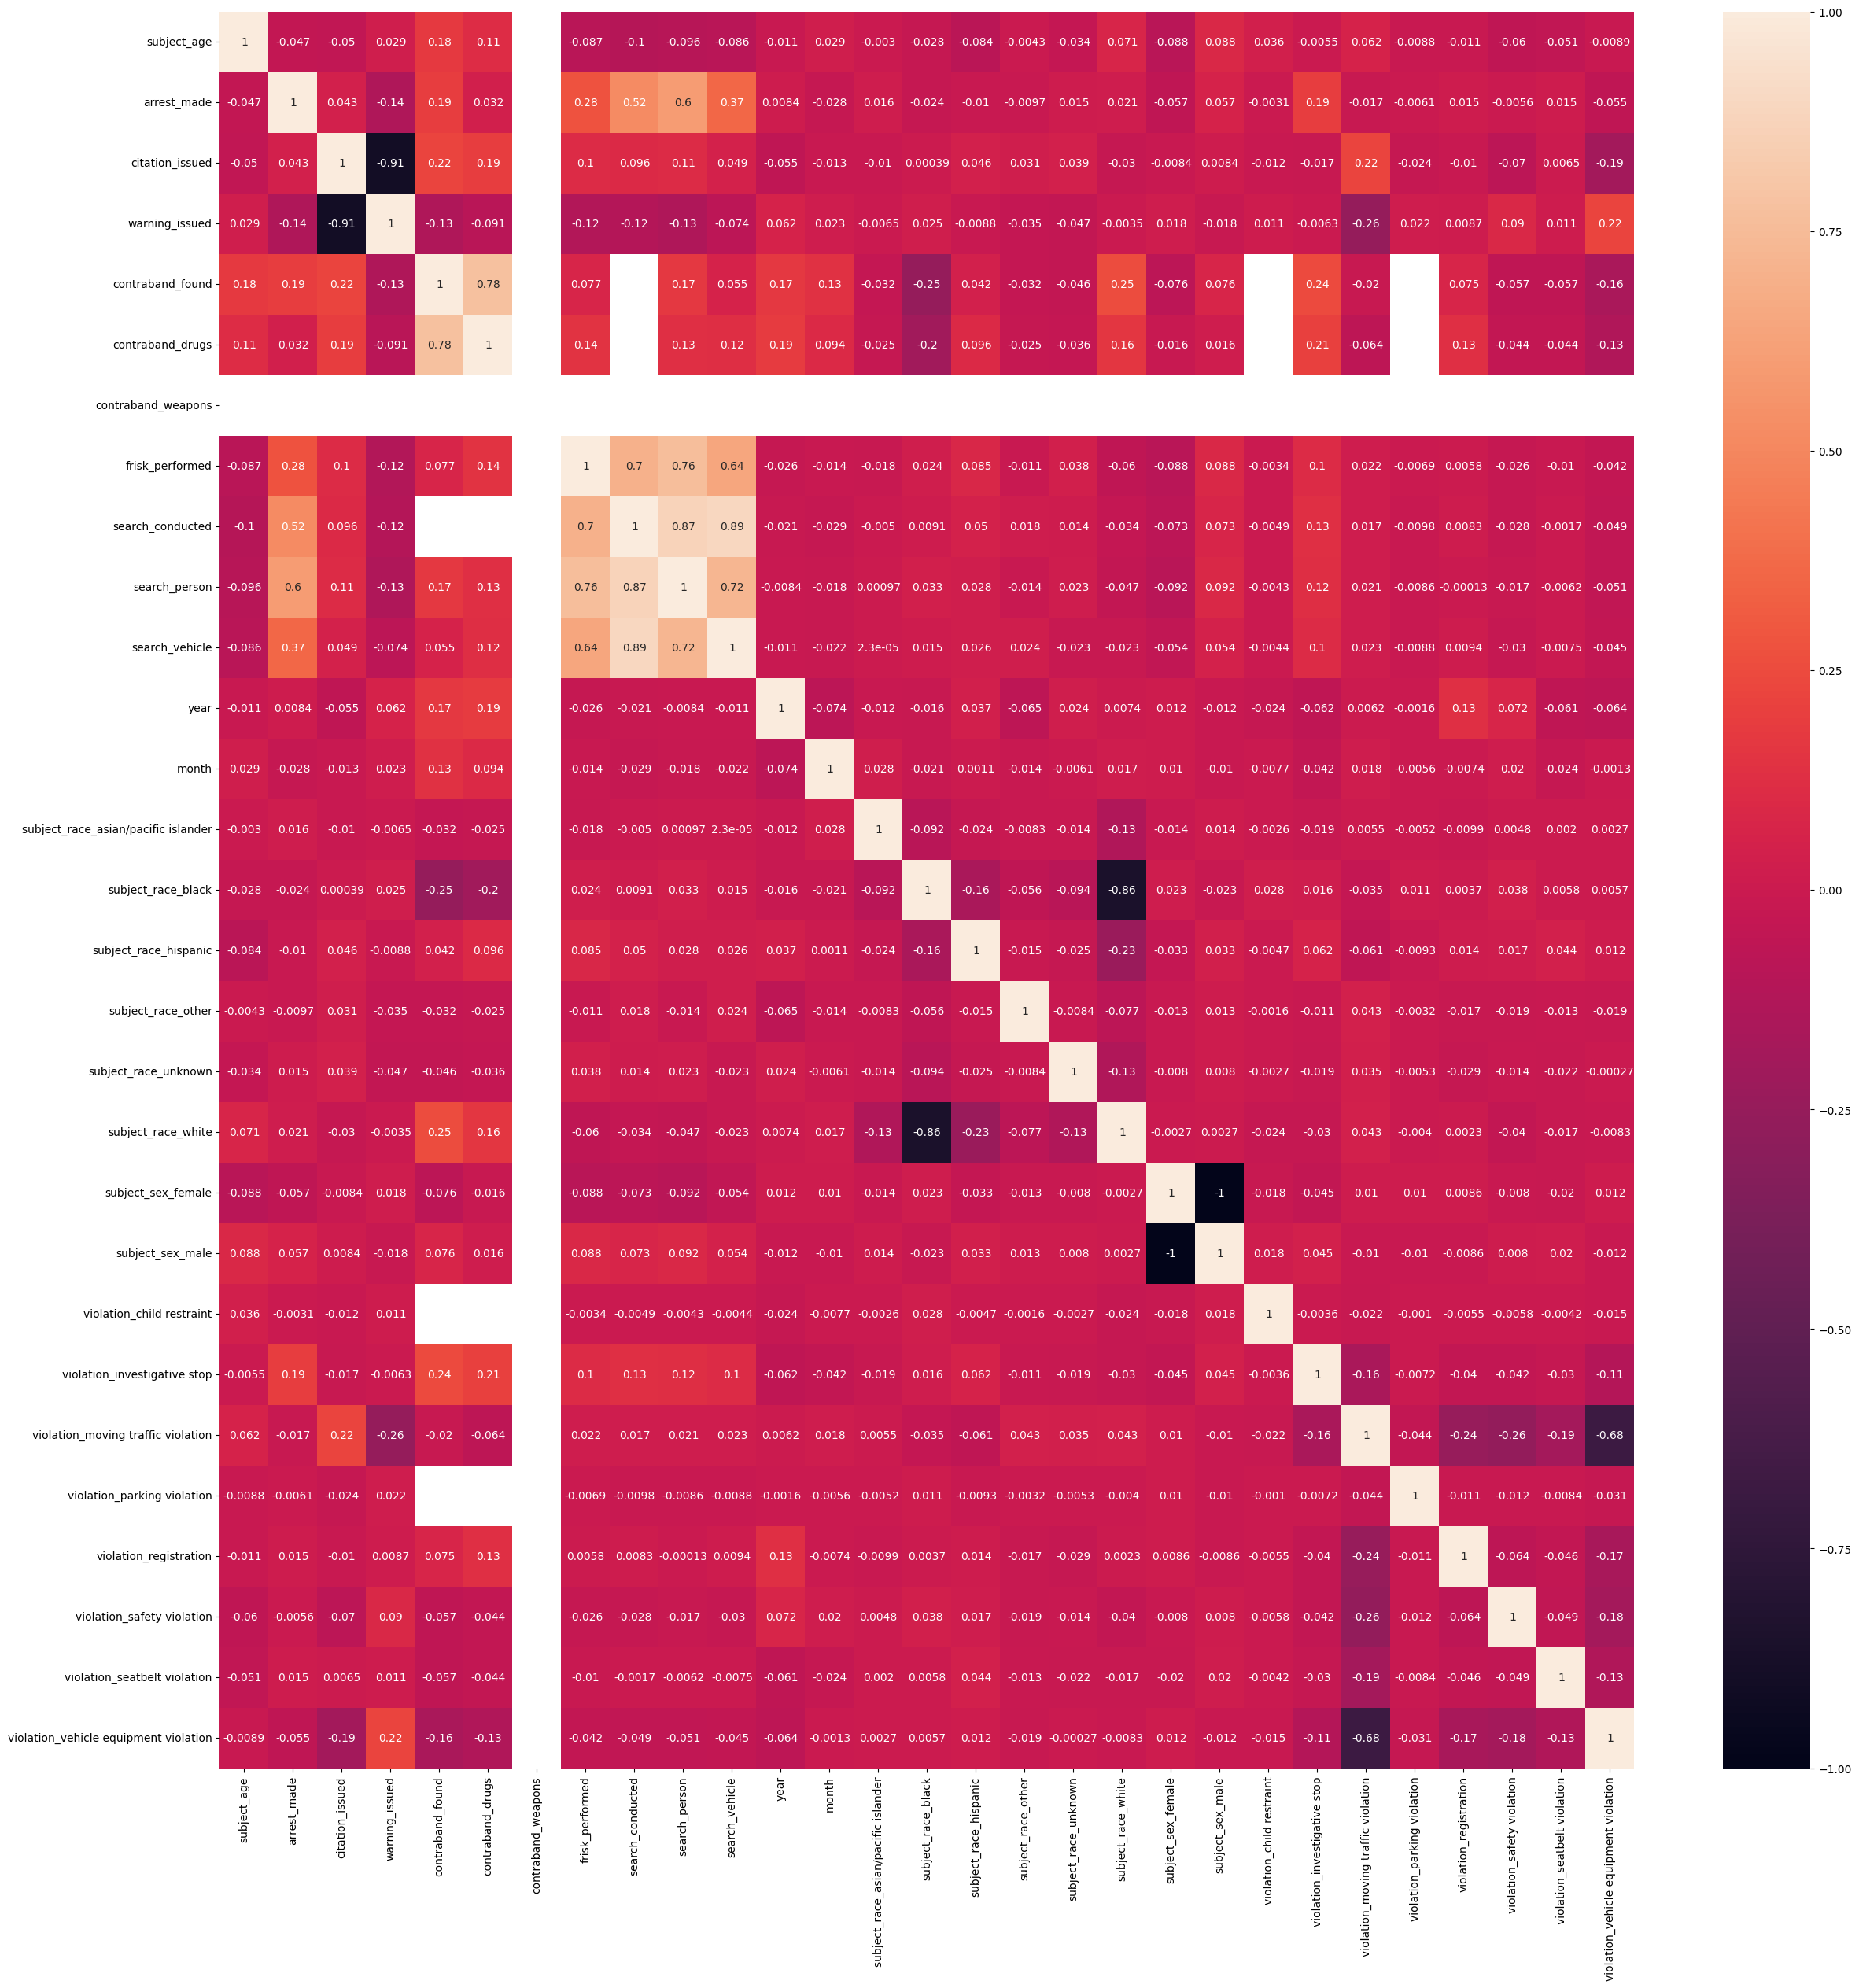

In [ ]:
noncorrelatable = ['date', 'time', 'location', 'lat', 'lng', 'precinct', 'reporting_area',
       'zone', 'officer_id_hash', 'type', 'outcome', 'search_basis',
       'vehicle_registration_state', 'notes', 'subject_race', 'subject_sex', 'violation', 'stardate']
corr_df = cleaned_stops.drop(labels=noncorrelatable, axis=1)
corr_matrix = corr_df.corr()
plt.figure(figsize=(corr_matrix.shape))
g = sns.heatmap(corr_matrix, annot=True)

### 1.b. Data cleaning
Once we have candidate features that look like they have a reasonably strong association with 'citation_issued' to be good predictors, and are **not** outcomes that are mutually exclusive with getting a traffic citation, we can limit our subsequent work to them. We will have to remove rows that have missing values for our surviving features.

In [ ]:
corr_df.columns

Index(['subject_age', 'arrest_made', 'citation_issued', 'warning_issued',
       'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'frisk_performed', 'search_conducted', 'search_person',
       'search_vehicle', 'year', 'month',
       'subject_race_asian/pacific islander', 'subject_race_black',
       'subject_race_hispanic', 'subject_race_other', 'subject_race_unknown',
       'subject_race_white', 'subject_sex_female', 'subject_sex_male',
       'violation_child restraint', 'violation_investigative stop',
       'violation_moving traffic violation', 'violation_parking violation',
       'violation_registration', 'violation_safety violation',
       'violation_seatbelt violation',
       'violation_vehicle equipment violation'],
      dtype='object')

In [ ]:
usable_cols = ['citation_issued', 'violation_moving traffic violation', 'subject_age', 'contraband_found', 'search_person',
                   'subject_sex_male', 'subject_race_white']
pred_df = corr_df[usable_cols]

#The following line imputes 0's for NaNs so we may continue with classification
pred_df['contraband_found'].fillna(value=0, inplace=True)
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2469050 to 2325584
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   citation_issued                     2000 non-null   bool   
 1   violation_moving traffic violation  2000 non-null   int64  
 2   subject_age                         2000 non-null   float64
 3   contraband_found                    2000 non-null   float64
 4   search_person                       2000 non-null   bool   
 5   subject_sex_male                    2000 non-null   int64  
 6   subject_race_white                  2000 non-null   int64  
dtypes: bool(2), float64(2), int64(3)
memory usage: 162.2+ KB


<ipython-input-11-ed1e0a4ca62b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['contraband_found'].fillna(value=0, inplace=True)


### 1.c. Data splitting
We can split the dataframe with the outcome and features used to predict the outcome in the same way we have done it before. Remember that we are dealing with a sample of 2000 stops here.

In [ ]:
y = pred_df['citation_issued']
X = pred_df.drop(labels='citation_issued', axis=1)

# split the sampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80, test_size=0.20)
# split the sampled training set into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size=0.75, test_size=0.25)

# reminder of size of training, validation, and test sets
print("X_train shape: ", X_train.shape)
print("X_validate shape: ", X_validate.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (1200, 6)
X_validate shape:  (400, 6)
X_test shape:  (400, 6)


### Using sklearn to make a logistic classifier
We have the citation data all prepared to use to fit a logistic classifier, using the predictive features we selected above. Remember to keep your expectations humble, since the features in the dataset probably are not enough to make a really good prediction of which driver gets a citation.

In [ ]:
#Construct a logistic regression model with l2 penalty (aka ridge regularization)
logit_cf = linear.LogisticRegression(penalty='l2', class_weight=None)

# fit the logistic regression model to the training set
model = logit_cf.fit(X_train, y_train)

# check the accuracy on the training and validation sets
print("Accuracy on training set: ", model.score(X_train, y_train))
print("Accuracy on validation set: ", model.score(X_validate, y_validate))
print("Accuracy on test set: ", model.score(X_test, y_test))

Accuracy on training set:  0.775
Accuracy on validation set:  0.7625
Accuracy on test set:  0.8175


In [ ]:
#Run this cell
y = y.reset_index()
y

,raw_row_number,citation_issued
0,2469050,False
1,1210355,False
2,412047,True
3,2326635,False
4,1125061,False
...,...,...
1995,2887227,False
1996,2835032,True
1997,1199475,False
1998,3046659,False


In [ ]:
#Run this cell to look at how our model predicted each row vs. the actual citation response within our test set
test_df = X_test.reset_index()
test_df["Our Model Prediction"] = model.predict(X_test)
merge = pd.merge(test_df, y, on="raw_row_number")
merge.head(100)

,raw_row_number,violation_moving traffic violation,subject_age,contraband_found,search_person,subject_sex_male,subject_race_white,Our Model Prediction,citation_issued
0,2583809,1,34.0,0.0,False,1,0,False,False
1,2779962,0,39.0,0.0,False,1,0,False,False
2,1040638,1,52.0,0.0,False,0,0,False,False
3,1899243,1,36.0,0.0,False,0,1,False,True
4,873443,1,32.0,0.0,False,0,0,False,False
...,...,...,...,...,...,...,...,...,...
95,1211523,0,47.0,0.0,False,0,1,False,False
96,2647376,0,52.0,0.0,False,1,1,False,False
97,2205522,0,47.0,0.0,False,0,0,False,False
98,2268515,0,46.0,0.0,False,0,0,False,False


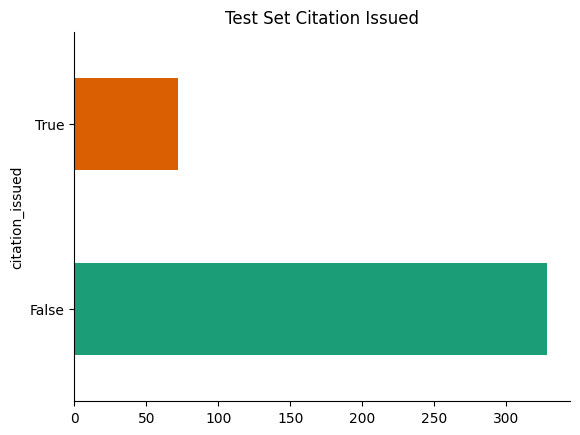

In [ ]:
#Let's look at the difference in distribution of our model's prediction vs. real citation responses on our test set
plt.title("Test Set Citation Issued")
merge.groupby('citation_issued').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

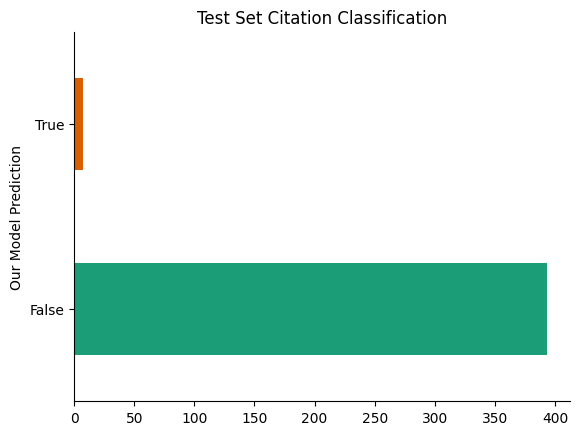

In [ ]:
plt.title("Test Set Citation Classification")
merge.groupby('Our Model Prediction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Our model tends to classify more false negatives than false positives.

In [ ]:
positive_class_probs = [x[1] for x in model.predict_proba(X_test)]

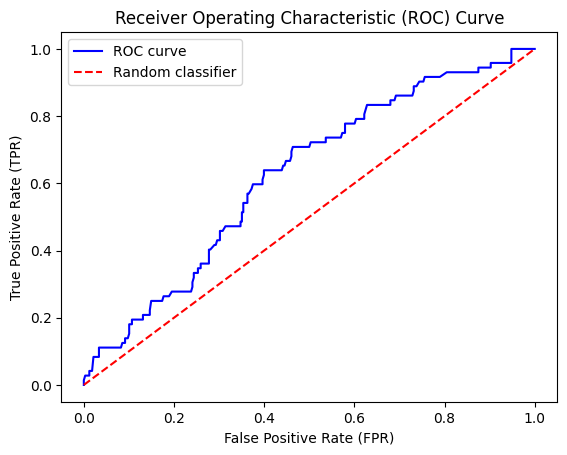

Area Under the ROC Curve (AUC): 0.6230098238482386


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_true contains the true labels and y_scores contains the predicted probabilities
fpr, tpr, thresholds = roc_curve(merge["citation_issued"].values, positive_class_probs)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate AUC
auc = roc_auc_score(merge["citation_issued"].values, positive_class_probs)
print("Area Under the ROC Curve (AUC):", auc)

The closer the AUC is to .5, the worse our classifier is. With an AUC of .5, we might as well be classifying at random! Hence this classifier is not performing well on the test set, so we may need more features and data!

**Curious about the importance of our features in our model?** Let us take a closer look at which ones were weighted more?

In [ ]:
features = list(X_train.columns)
logistic_coeffs = logit_cf.coef_[0]
list(zip(features, logistic_coeffs))

[('violation_moving traffic violation', 1.2263028910518148),
 ('subject_age', -0.007810520412747469),
 ('contraband_found', 0.45648263588301824),
 ('search_person', 0.8045274597959879),
 ('subject_sex_male', 0.1407461534673384),
 ('subject_race_white', -0.18731632645866841)]

In [ ]:
#ANALYZE YOURSELF
#What do these coefficients mean??